# Individual Planning Report Group 43 - Anson Ng Student ID (34713040) 


## Data description

In [62]:
#load library first
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


There are two datasets, the player dataset and the session dataset. The player dataset is the dataset that contains information regarding each player that has logged on to play the game. This information was gathered based upon reports from players and the session dataset are calculations based off of the time they logged in to play. 

This player dataset includes
| Variable | Type | Description |
|----------|------|-------------|
|1. experience|character|Gaming skill level: Beginner, Amateur, Pro, Veteran|
|2. name|character|Player’s real name|
|3. hashedEmail|character|Unique player ID (hashed email)|
|4. gender|character|Player’s gender: Male, Female, Other, Prefer not to say|
|5. subscribe|logical|Whether player subscribed to newsletter (TRUE/FALSE)|
|6. played_hours|numeric|Total hours played|
|7. age|numeric|Player’s age (some NAs present)|

It is important to note 
- age contains missing values; we must handle NAs.
- gender contains categories beyond Male/Female, which may need filtering.
- Some variables (e.g., name, hashedEmail) are identifiers and not predictive.

The session dataset includes
| Variable | Type | Description |
|----------|------|-------------|
|1. hashedEmail|character|Player identifier|
|2. start_time|datetime|Session start (date & time)|
|3. end_time|datetime|Session end (date & time)|
|4. original_start_time|numeric|Start time in UNIX milliseconds|
|5. original_end_time|numeric|End time in UNIX milliseconds|

It is important to note 
- Each player can have multiple sessions.
- Start and end times are recorded in both datetime and UNIX formats, which may require wrangling.
- Since played_hours already totals each player’s game time, session-level start and end times are unnecessary for predicting subscription and would add redundant complexity.

With the steps detailed in later steps, we will be able to determine the summary statistics value of  quantitative data within our tables include 
the maximum, minimum, average and median value of the quantitative values. 

|variable|Maximum|Minimum| average|median|
|------|-------|------|-------------|------|
|age|58|9|21.14|19|
|played_hours|223.1|0|5.85|0.1|
|duration(time of each session in ms)|15540|180|3051.51|1800|

## Question 

**Broad Question:**
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between player types?

**Specific Question:**
Which is more predictive of subscription: a player’s gender or played_hours?

> These two data sets should be compared to determine whether its a players dedication or attribute that drives their decision to subscribe. 

**Data and Approach:**
We will compare the predictive ability of gender and played_hours for subscription. Only the player's dataset is required to determine predictability. Steps include:
- Filter missing values
- Select relevant columns: played_hours, gender, subscribe
- Convert gender to categorical and ensure played_hours is numeric
- applying a linear regression model. 
    

## Exploring Data Analysis

The summary of quantitiave variables "played_hours", "age" and "duration" (time between start and end time) . 


**R commands to wrangle and summarize the data**

In [63]:
#load the datasets
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions    

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


For each dataset to be tidy,  ensure each variable is in its own column, each observation is in its own row, and each measured value is in a single cell. 

Player Dataset 
- does not need to be wrangled
- each observation is in its own row 
- only one value in one cell

Session Dataset
- the start_time has two values in its column
- the end_time has two values in its column
- needs to be wrangled
  

In [64]:
wrangled_session <- sessions |>
  separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
  separate(end_time, into = c("end_date", "end_time"), sep = " ")
wrangled_session

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,15:36,28/07/2024,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06:15,25/07/2024,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02:26,20/05/2024,02:45,1.71617e+12,1.71617e+12


In [65]:
#filter and select to find (summary statistic) for "played_hours" and "age"
#the original_start_time and original_end_time refers to the timestamp, so instead we calculate the duration of the session and caclulate the summary statistic. 
summary_played_hours <- players |> 
select(played_hours) |> 
summarize(average_played_hours = round(mean(played_hours,na.rm = TRUE ),2), minimum_played_hours = round(min(played_hours,na.rm = TRUE ),2), median_played_hours = round(median(played_hours,na.rm = TRUE ),2), max_played_hours = round(max(played_hours,na.rm = TRUE ),2)   )

summary_age <- players |> 
select(Age) |> 
summarize(average_age = round(mean(Age,  na.rm = TRUE),2), minimum_age = round(min(Age,na.rm = TRUE ),2), median_age = round(median(Age,na.rm = TRUE ),2), maximum_age = round(max(Age,na.rm = TRUE ),2)  )

sessions <- sessions |>
    mutate(original_end_time = as.numeric(as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")),
           original_start_time = as.numeric(as.POSIXct(start_time, format = "%d/%m/%Y %H:%M")))

session_duration <- sessions |>
    mutate(duration = original_end_time - original_start_time) |>
    select(duration)

summary_durations <- session_duration |> 
select(duration) |>
    summarize(averge_duration = round(mean(duration, na.rm = TRUE),2), minimum_duration = min(duration, na.rm = TRUE), median_duration = median(duration, na.rm = TRUE), maximum_duration = max(duration, na.rm = TRUE))

summary_played_hours 
summary_age
summary_durations

average_played_hours,minimum_played_hours,median_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,0.1,223.1


average_age,minimum_age,median_age,maximum_age
<dbl>,<dbl>,<dbl>,<dbl>
21.14,9,19,58


averge_duration,minimum_duration,median_duration,maximum_duration
<dbl>,<dbl>,<dbl>,<dbl>
3051.51,180,1800,15540


To prepare for exploratory visualizations, we will select relevant columns, remove missing or invalid values, and convert variables to the appropriate type. 
Since our question only revolves around the player data, we will only produce visualizations of the player dataset. 

In [66]:
# wrangling the data
wrangled_players <- players |> 
  select(subscribe, played_hours, gender) |>
filter(!is.na(played_hours), !is.na(gender), !is.na(subscribe)) |> 
  mutate(subscribe = as.factor(subscribe),gender = as.factor(gender), played_hours = as.numeric(played_hours))

wrangled_players 

subscribe,played_hours,gender
<fct>,<dbl>,<fct>
TRUE,30.3,Male
TRUE,3.8,Male
FALSE,0.0,Male
⋮,⋮,⋮
FALSE,0.0,Prefer not to say
FALSE,2.3,Male
TRUE,0.2,Other


**exploratory visualizations**

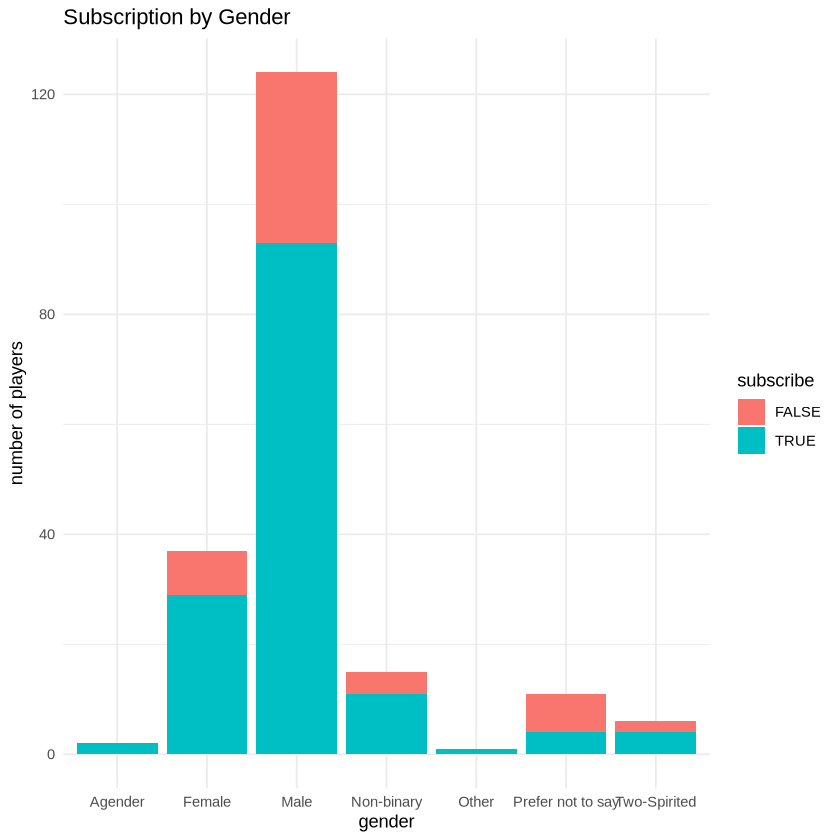

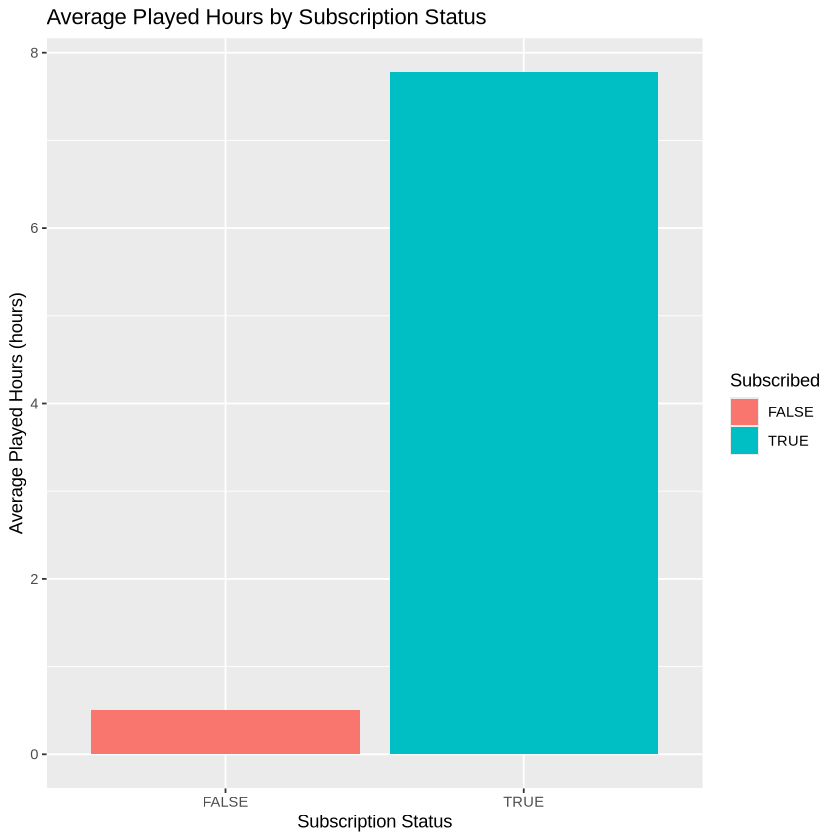

In [69]:
gender_ver_subscribe <- wrangled_players |>
ggplot(aes(x=gender, fill = subscribe)) + 
geom_bar() + 
labs(x = "gender", y="number of players", fill = "subscribe", title = "Subscription by Gender" ) + 
theme_minimal()

summary_subscribe <- wrangled_players |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

hours_ver_subscribe <- ggplot(summary_subscribe, aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_col() +
  labs(title = "Average Played Hours by Subscription Status", x = "Subscription Status",y = "Average Played Hours (hours)",fill = "Subscribed")

gender_ver_subscribe
hours_ver_subscribe

**Subscription by gender** Males dominate the dataset, which may bias results. Additionally majority of players across all genders subscribe to the game-related newsletter 

**Average played hours by subscription status** indicates that subscribers have higher average played hours, suggesting it is a strong predictor of subscription.

## Method and Plan

**Question** 
Can played_hours or gender better predict a player’s likelihood to subscribe to the newsletter?

 **Method**
 Create two linear regression models for each variable played_hours and gender. With the linear regression model, we can produce a RMSE value that will demontrate the predictor with a lower value to be more predictive of subscription likelihood. Additionally the coefficients will show how changes in the predictor affect subscription probability 

> A linear regression model is preferred as it provides **interpretable coefficients** that quantify how strongly each predictor influences subscription likelihood while K-NN depends more heavily on the selected K. 
 
> By converting subscribe into a **binary variable** (1 = subscribes, 0 = does not), we can quantify the relationship between these variables and subscription likelihood. 

> the predictor variable "gender" is likely a poor predictor according to our visual but we can confirm with its interpretable coefficient through the linear regression model 

**Assumptions**
Assumptions that will need to be made includes 
- the relationship between each variable and subscription is linear
- there aren't too many outliers
- there are observations for all variables

**Potential limitations or weaknesses**
- Binary outcome may bias toward majority class like male
- Non-linear relationships not captured thus an over or under estimation.


 **Plan** 
 
	1.	Split wrangled data into 60% training and 40% testing.
	2.	Use K-fold cross-validation on the training set to tune and validate the model.
	3.	Fit linear regression models separately for played_hours and gender.
	4.	Predict on the testing set and calculate RMSE.
	5.	Compare models: lower RMSE and larger coefficients indicate stronger predictive power.